In [ ]:
!pip3 install pyvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 5.2 MB/s 
     |████████████████████████████████| 40 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 50.0 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=57917800a3900a5658beea2c140214a1c7929a6eeeaedb13f0503282bd1b17b0
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
from pyvis import network as net
import plotly.graph_objects as go
from pandas.core.frame import DataFrame
from IPython.core.display import display, HTML

In [ ]:
data = pd.read_csv('/content/sample_data/Video Games Dataset.csv', usecols=['Publisher','Platform'])
print(data) 

    Platform                               Publisher
0        Wii                                Nintendo
1        NES                                Nintendo
2        Wii                                Nintendo
3        Wii                                Nintendo
4         GB                                Nintendo
..       ...                                     ...
194      PS3                         Electronic Arts
195       PS             Sony Computer Entertainment
196      PS4                         Electronic Arts
197     X360  Warner Bros. Interactive Entertainment
198       PS                                     NaN

[199 rows x 2 columns]


In [ ]:
data.isnull().sum()


Platform     0
Publisher    1
dtype: int64

In [ ]:
data.duplicated().sum()


141

In [ ]:
data['Publisher'].replace('N/A',np.NaN,inplace=True)
data['Publisher'].replace('NaN',np.NaN,inplace=True)

data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data


,Platform,Publisher
0,Wii,Nintendo
1,NES,Nintendo
4,GB,Nintendo
6,DS,Nintendo
15,X360,Microsoft Game Studios
16,PS3,Take-Two Interactive
17,SNES,Nintendo
22,X360,Take-Two Interactive
23,GBA,Nintendo
26,X360,Activision


In [ ]:
data.isnull().sum()


Platform     0
Publisher    0
dtype: int64

In [ ]:
 B = nx.Graph()
 Publisher = data['Publisher']
 Platform = data['Platform']
 print("Số nền tảng: ", Platform.nunique())
 print("Số nhà phát hành: ", Publisher.nunique())
 print("Số cạnh: ",len(data))


Số nền tảng:  20
Số nhà phát hành:  21
Số cạnh:  57


In [ ]:
for index, row in data.iterrows():
  B.add_edge(row['Publisher'], row['Platform'],weight=1)
B.add_nodes_from(Publisher,bipartite=0)
B.add_nodes_from(Platform,bipartite=1)


<Figure size 864x864 with 0 Axes>

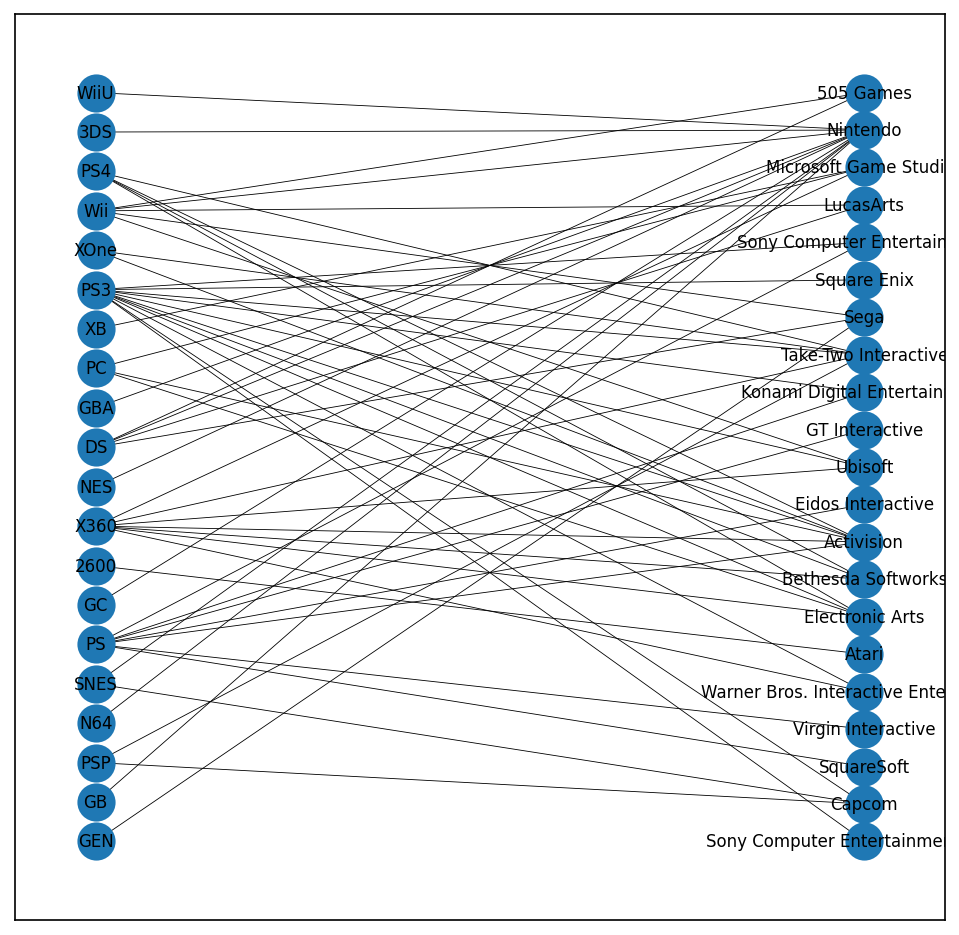

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Platform),font_size=8,width=0.4)

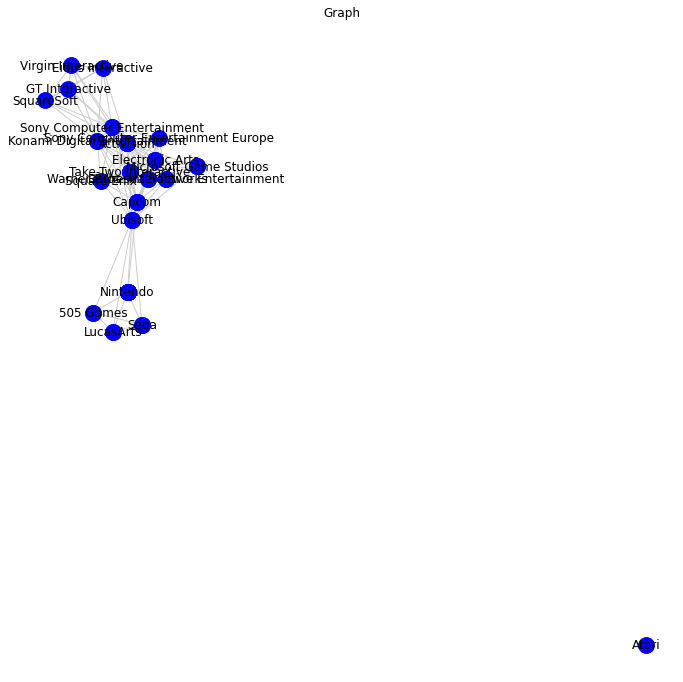

In [ ]:
from networkx.algorithms import bipartite
G = bipartite.weighted_projected_graph(B,Publisher)
plt.figure(figsize=(12,12))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G,layout,nodelist=Publisher,node_size=250,node_color='blue')
nx.draw_networkx_edges(G,layout,edge_color='#cccccc')
node_labels=dict(zip(Publisher,Publisher))
nx.draw_networkx_labels(G,layout,labels=node_labels)
plt.axis('off')
plt.title('Graph')
plt.show()

In [ ]:
labels = nx.get_edge_attributes(G, 'weight')
df = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df = df.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df.to_csv (r'/content/sample_data/gephi.csv', index = False, header=True)

In [ ]:
df = pd.read_csv('/content/sample_data/gephi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,Nintendo,Sega
1,Nintendo,LucasArts
2,Nintendo,505 Games
3,Nintendo,Capcom
4,Nintendo,Ubisoft
...,...,...
85,Konami Digital Entertainment,Sony Computer Entertainment Europe
86,Sony Computer Entertainment Europe,Square Enix
87,Sony Computer Entertainment Europe,Warner Bros. Interactive Entertainment
88,Virgin Interactive,Eidos Interactive


In [ ]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 20
Số cạnh của đồ thị là 90


In [ ]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

In [ ]:
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

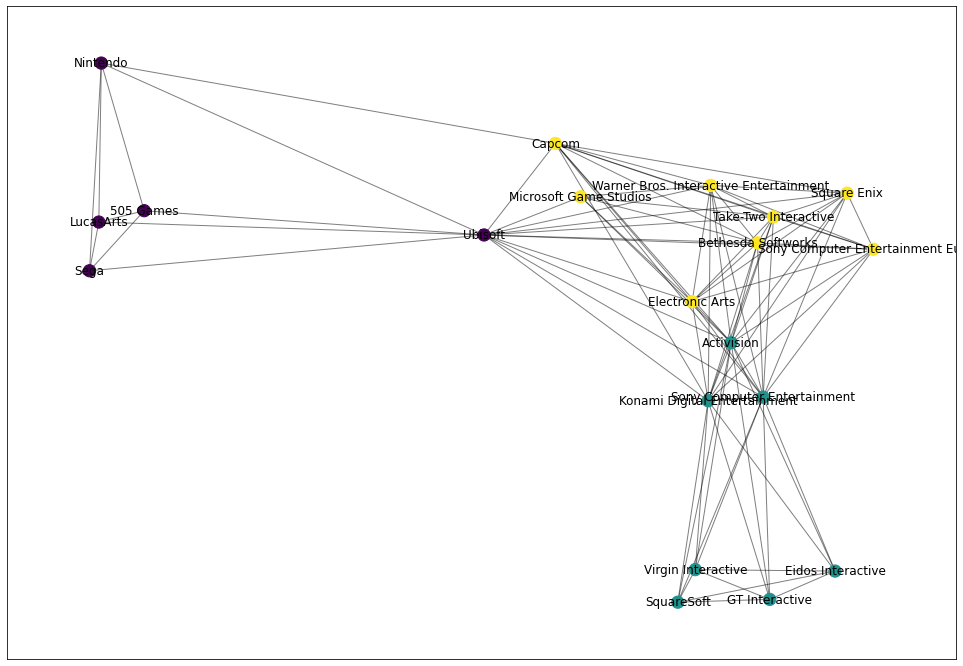

In [ ]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm

plt.figure(figsize=(17, 12))
#compute the best partition
partition = community_louvain.best_partition(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
import numpy as np
values = list(partition.values())

print('Số lượng cộng đồng: ', len(np.unique(values)))

Số lượng cộng đồng:  3


In [ ]:
# for i in range(len(np.unique(values))):
#   print('Nhóm ', i, ":")
#   values = []
#   for name, k in partition.items():
#     if k == i:
#       values.append(name)
#       print(name)

#   print(values)
#   print("")

values = list(partition.values())
print("Number of communities: ", len(np.unique(values)))
print()

# Lou

groups = [] # Tạo group sẵn
print("------------- Phân cụm -------------")
for i in range(len(np.unique(values))):
  print("==> Group ", i, "===========================")
  values = []
  for name, k in partition.items():
    if k == i:
       print(name, end=' | ')
       values.append(name)
  groups.append(values) # Thêm vào group
  print()
  print()


Number of communities:  3

------------- Phân cụm -------------
==> Group  0 ===========================
Nintendo | Sega | LucasArts | 505 Games | Ubisoft | 

==> Group  1 ===========================
Activision | Sony Computer Entertainment | Konami Digital Entertainment | Virgin Interactive | GT Interactive | SquareSoft | Eidos Interactive | 

==> Group  2 ===========================
Capcom | Microsoft Game Studios | Electronic Arts | Take-Two Interactive | Bethesda Softworks | Warner Bros. Interactive Entertainment | Square Enix | Sony Computer Entertainment Europe | 



In [ ]:
group_0 = data.loc[data['Publisher'].isin(groups[0])]
print(group_0)

    Platform  Publisher
0        Wii   Nintendo
1        NES   Nintendo
4         GB   Nintendo
6         DS   Nintendo
17      SNES   Nintendo
23       GBA   Nintendo
29       3DS   Nintendo
42       N64   Nintendo
55       Wii    Ubisoft
80       Wii       Sega
100       GC   Nintendo
101     WiiU   Nintendo
106      Wii  505 Games
117      PS3    Ubisoft
130      GEN       Sega
136      Wii  LucasArts
139       DS  505 Games
144     X360    Ubisoft
168       DS       Sega
187       DS  LucasArts


In [ ]:
result0 = pd.pivot_table(group_0, values = "Publisher", index=["Platform"], aggfunc=np.count_nonzero)
result0 = result0.reset_index(["Platform"])
result0.sort_values(by = "Publisher", ascending = False)
group_0.to_csv("group0.csv", index = False, header = True, encoding = "utf-8")


Ubisoft : 0.0828602268636189
Activision : 0.07661842725980304
Sony Computer Entertainment : 0.07179139073176209
Konami Digital Entertainment : 0.07179139073176209
Capcom : 0.057750080007881725
Electronic Arts : 0.05634579780691671
Take-Two Interactive : 0.05634579780691671
Bethesda Softworks : 0.05634579780691671
Warner Bros. Interactive Entertainment : 0.05634579780691671
Square Enix : 0.051511341182038824
Sony Computer Entertainment Europe : 0.051511341182038824
Nintendo : 0.037191168256243134
Virgin Interactive : 0.03575429270571593
GT Interactive : 0.03575429270571593
SquareSoft : 0.03575429270571593
Eidos Interactive : 0.03575429270571593
Microsoft Game Studios : 0.03395299848021598
Sega : 0.03220709108470163
LucasArts : 0.03220709108470163
505 Games : 0.03220709108470163


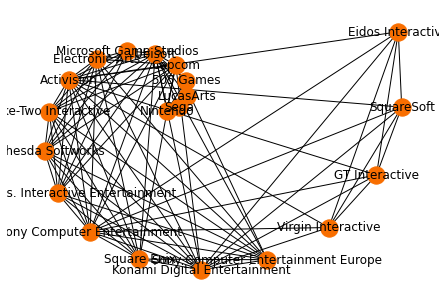

In [ ]:
ppr1 = nx.pagerank(G)
sortedRank = dict(sorted(ppr1.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedRank.items():
        print(attr, ":", value)
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

[['Sega', 'LucasArts', 'Nintendo', '505 Games'], ['Sony Computer Entertainment', 'Electronic Arts', 'Virgin Interactive', 'Activision', 'Take-Two Interactive', 'GT Interactive', 'SquareSoft', 'Microsoft Game Studios', 'Square Enix', 'Bethesda Softworks', 'Eidos Interactive', 'Warner Bros. Interactive Entertainment', 'Konami Digital Entertainment', 'Capcom', 'Sony Computer Entertainment Europe', 'Ubisoft']]


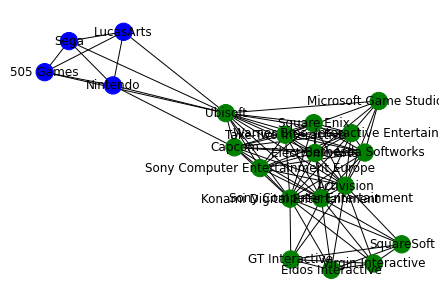

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality_df = print_table(closeness_centrality.items(), ['Node', 'Closeness centrality'])

closeness_centrality_df

,Node,Closeness centrality
0,Nintendo,0.513514
1,Sega,0.500000
2,LucasArts,0.500000
3,505 Games,0.500000
4,Capcom,0.703704
5,Ubisoft,0.826087
6,Microsoft Game Studios,0.593750
7,Electronic Arts,0.703704
8,Activision,0.826087
9,Take-Two Interactive,0.703704


In [ ]:
top_ten_max_closeness_cen = sorted_closeness_centrality[:10]
print('Top 10 nhà phát hành có Closeness centrality cao nhất: ')
print_table(top_ten_max_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 nhà phát hành có Closeness centrality cao nhất: 


,Counrty,Closeness centrality
0,Ubisoft,0.826087
1,Activision,0.826087
2,Sony Computer Entertainment,0.791667
3,Konami Digital Entertainment,0.791667
4,Capcom,0.703704
5,Electronic Arts,0.703704
6,Take-Two Interactive,0.703704
7,Bethesda Softworks,0.703704
8,Warner Bros. Interactive Entertainment,0.703704
9,Square Enix,0.678571


In [ ]:
top_ten_min_closeness_cen = sorted_closeness_centrality[-10:]
print('Top 10 phát hành có Closeness centrality nhỏ nhất: ')
print_table(top_ten_min_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 phát hành có Closeness centrality nhỏ nhất: 


,Counrty,Closeness centrality
0,Sony Computer Entertainment Europe,0.678571
1,Microsoft Game Studios,0.593750
2,Virgin Interactive,0.527778
3,GT Interactive,0.527778
4,SquareSoft,0.527778
5,Eidos Interactive,0.527778
6,Nintendo,0.513514
7,Sega,0.500000
8,LucasArts,0.500000
9,505 Games,0.500000


In [ ]:
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)

bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])

bet_cen_df

,Node,Betweenness centrality
0,Nintendo,1.500000
1,Sega,0.000000
2,LucasArts,0.000000
3,505 Games,0.000000
4,Capcom,6.500000
5,Ubisoft,51.833333
6,Microsoft Game Studios,0.000000
7,Electronic Arts,0.833333
8,Activision,20.833333
9,Take-Two Interactive,0.833333


In [ ]:
top_ten_max_bet_cen = sorted_bet_cen[:10]
print('Top 10 nhà phát hành có Betweenness centrality lớn nhất: ')
print_table(top_ten_max_bet_cen, ['DestinationCountry', 'Betweenness centrality'])

Top 10 nhà phát hành có Betweenness centrality lớn nhất: 


,DestinationCountry,Betweenness centrality
0,Ubisoft,51.833333
1,Activision,20.833333
2,Sony Computer Entertainment,16.000000
3,Konami Digital Entertainment,16.000000
4,Capcom,6.500000
5,Nintendo,1.500000
6,Electronic Arts,0.833333
7,Take-Two Interactive,0.833333
8,Bethesda Softworks,0.833333
9,Warner Bros. Interactive Entertainment,0.833333


In [ ]:
top_ten_min_bet_cen = sorted_bet_cen[-10:]
print('Top 10 nhà phát hành có Betweenness centrality nhỏ nhất nhất: ')
print_table(top_ten_min_bet_cen, ['DestinationCountry', 'Betweenness centrality'])

Top 10 nhà phát hành có Betweenness centrality nhỏ nhất nhất: 


,DestinationCountry,Betweenness centrality
0,Sega,0.0
1,LucasArts,0.0
2,505 Games,0.0
3,Microsoft Game Studios,0.0
4,Square Enix,0.0
5,Sony Computer Entertainment Europe,0.0
6,Virgin Interactive,0.0
7,GT Interactive,0.0
8,SquareSoft,0.0
9,Eidos Interactive,0.0
